# Creating a csv with live stock market data

In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import os
today = date.today().strftime("%Y-%m-%d")


## Downloading Data

In [48]:
investment = 1e7
start_date = '2017-01-01'
end_date = '2018-01-01'
assets = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
weights = [0.25, 0.25, 0.25, 0.25]

Portfolio = {assets[0]: weights[0],
             assets[1]: weights[1],
             assets[2]: weights[2],
             assets[3]: weights[3],
             'investment': investment,
             'start_date': start_date}


data = yf.download(" ".join(assets), start="2017-01-01", end=end_date)

data

c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[**********************50%%                      ]  2 of 4 completedc:\Users\olive\anaconda3

Price       Adj Close                                       Close             \
Ticker           AAPL       AMZN       GOOG       MSFT       AAPL       AMZN   
Date                                                                           
2017-01-03  27.023710  37.683498  39.306999  57.138721  29.037500  37.683498   
2017-01-04  26.993456  37.859001  39.345001  56.883080  29.004999  37.859001   
2017-01-05  27.130735  39.022499  39.701000  56.883080  29.152500  39.022499   
2017-01-06  27.433187  39.799500  40.307499  57.376122  29.477501  39.799500   
2017-01-09  27.684465  39.846001  40.332500  57.193508  29.747499  39.846001   
...               ...        ...        ...        ...        ...        ...   
2017-12-22  41.372978  58.417999  53.006001  79.818291  43.752499  58.417999   
2017-12-26  40.323345  58.838001  52.837002  79.715637  42.642502  58.838001   
2017-12-27  40.330448  59.112999  52.468498  80.004974  42.650002  59.112999   
2017-12-28  40.443920  59.305000  52.407001  80.014320  42.770000  59.305000   
2017-12-29  40.006569  58.473499  52.320000  79.846291  42.307499  58.473499   

Price                                  High             ...        Low  \
Ticker           GOOG       MSFT       AAPL       AMZN  ...       GOOG   
Date                                                    ...              
2017-01-03  39.306999  62.580002  29.082500  37.938000  ...  38.790001   
2017-01-04  39.345001  62.299999  29.127501  37.984001  ...  39.158001   
2017-01-05  39.701000  62.299999  29.215000  39.119999  ...  39.250999   
2017-01-06  40.307499  62.840000  29.540001  39.972000  ...  39.610199   
2017-01-09  40.332500  62.639999  29.857500  40.088501  ...  40.141499   
...               ...        ...        ...        ...  ...        ...   
2017-12-22  53.006001  85.510002  43.855000  58.730999  ...  52.972000   
2017-12-26  52.837002  85.400002  42.867500  58.916000  ...  52.509998   
2017-12-27  52.468498  85.709999  42.695000  59.364498  ...  52.402500   
2017-12-28  52.407001  85.720001  42.962502  59.505001  ...  52.238499   
2017-12-29  52.320000  85.540001  42.647499  59.200001  ...  52.244999   

Price                       Open                                      Volume  \
Ticker           MSFT       AAPL       AMZN       GOOG       MSFT       AAPL   
Date                                                                           
2017-01-03  62.130001  28.950001  37.896000  38.940498  62.790001  115127600   
2017-01-04  62.119999  28.962500  37.919498  39.417999  62.480000   84472400   
2017-01-05  62.029999  28.980000  38.077499  39.304001  62.189999   88774400   
2017-01-06  62.040001  29.195000  39.118000  39.763000  62.299999  127007600   
2017-01-09  62.540001  29.487499  39.900002  40.320000  62.759998  134247600   
...               ...        ...        ...        ...        ...        ...   
2017-12-22  84.919998  43.669998  58.604000  53.055500  85.400002   65397600   
2017-12-26  85.029999  42.700001  58.417999  52.903500  85.309998  132742000   
2017-12-27  85.220001  42.525002  58.995499  52.869499  85.650002   85992800   
2017-12-28  85.550003  42.750000  59.450001  52.580002  85.900002   65920800   
2017-12-29  85.500000  42.630001  59.117500  52.335999  85.629997  103999600   

Price                                      
Ticker           AMZN      GOOG      MSFT  
Date                                       
2017-01-03   70422000  33146000  20694100  
2017-01-04   50210000  21460000  21340000  
2017-01-05  116602000  26704000  24876000  
2017-01-06  119724000  32804000  19922900  
2017-01-09   68922000  25492000  20382700  
...               ...       ...       ...  
2017-12-22   31702000  15102000  14145800  
2017-12-26   40104000  15212000   9891200  
2017-12-27   37344000  25438000  14678000  
2017-12-28   36834000  16742000  10594300  
2017-12-29   53768000  17750000  18717400  

[251 rows x 24 columns]

### Flattening the headers so there is only 1 row
the nested headers cause issues when reading to and from csv

In [51]:
# Flatten headers in data
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.head()

,Adj Close_AAPL,Adj Close_AMZN,Adj Close_GOOG,Adj Close_MSFT,Close_AAPL,Close_AMZN,Close_GOOG,Close_MSFT,High_AAPL,High_AMZN,...,Low_GOOG,Low_MSFT,Open_AAPL,Open_AMZN,Open_GOOG,Open_MSFT,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_MSFT
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,27.023710,37.683498,39.306999,57.138721,29.037500,37.683498,39.306999,62.580002,29.082500,37.938000,...,38.790001,62.130001,28.950001,37.896000,38.940498,62.790001,115127600,70422000,33146000,20694100
2017-01-04,26.993456,37.859001,39.345001,56.883080,29.004999,37.859001,39.345001,62.299999,29.127501,37.984001,...,39.158001,62.119999,28.962500,37.919498,39.417999,62.480000,84472400,50210000,21460000,21340000
2017-01-05,27.130735,39.022499,39.701000,56.883080,29.152500,39.022499,39.701000,62.299999,29.215000,39.119999,...,39.250999,62.029999,28.980000,38.077499,39.304001,62.189999,88774400,116602000,26704000,24876000
2017-01-06,27.433187,39.799500,40.307499,57.376122,29.477501,39.799500,40.307499,62.840000,29.540001,39.972000,...,39.610199,62.040001,29.195000,39.118000,39.763000,62.299999,127007600,119724000,32804000,19922900
2017-01-09,27.684465,39.846001,40.332500,57.193508,29.747499,39.846001,40.332500,62.639999,29.857500,40.088501,...,40.141499,62.540001,29.487499,39.900002,40.320000,62.759998,134247600,68922000,25492000,20382700


### Asset Daily Returns

In [54]:
for a in assets:
    data[f'Daily Returns_{a}'] = data[f'Adj Close_{a}'].pct_change()

data.head()

,Adj Close_AAPL,Adj Close_AMZN,Adj Close_GOOG,Adj Close_MSFT,Close_AAPL,Close_AMZN,Close_GOOG,Close_MSFT,High_AAPL,High_AMZN,...,Open_GOOG,Open_MSFT,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_MSFT,Daily Returns_AAPL,Daily Returns_MSFT,Daily Returns_GOOG,Daily Returns_AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,27.023710,37.683498,39.306999,57.138721,29.037500,37.683498,39.306999,62.580002,29.082500,37.938000,...,38.940498,62.790001,115127600,70422000,33146000,20694100,NaN,NaN,NaN,NaN
2017-01-04,26.993456,37.859001,39.345001,56.883080,29.004999,37.859001,39.345001,62.299999,29.127501,37.984001,...,39.417999,62.480000,84472400,50210000,21460000,21340000,-0.001120,-0.004474,0.000967,0.004657
2017-01-05,27.130735,39.022499,39.701000,56.883080,29.152500,39.022499,39.701000,62.299999,29.215000,39.119999,...,39.304001,62.189999,88774400,116602000,26704000,24876000,0.005086,0.000000,0.009048,0.030732
2017-01-06,27.433187,39.799500,40.307499,57.376122,29.477501,39.799500,40.307499,62.840000,29.540001,39.972000,...,39.763000,62.299999,127007600,119724000,32804000,19922900,0.011148,0.008668,0.015277,0.019912
2017-01-09,27.684465,39.846001,40.332500,57.193508,29.747499,39.846001,40.332500,62.639999,29.857500,40.088501,...,40.320000,62.759998,134247600,68922000,25492000,20382700,0.009160,-0.003183,0.000620,0.001168


## Portfolio Daily Returns

In [57]:
data['Portfolio Daily Returns'] = weights[0]*data[f'Daily Returns_{assets[0]}'] + \
                                  weights[1]*data[f'Daily Returns_{assets[1]}'] + \
                                  weights[2]*data[f'Daily Returns_{assets[2]}'] + \
                                  weights[3]*data[f'Daily Returns_{assets[3]}']

### Portfolio Cumulative Returns

In [58]:
data['Portfolio Cumulative Returns'] = (1 + data['Portfolio Daily Returns']).cumprod()
data['Portfolio Value'] = data['Portfolio Cumulative Returns'] * investment
data.head()

,Adj Close_AAPL,Adj Close_AMZN,Adj Close_GOOG,Adj Close_MSFT,Close_AAPL,Close_AMZN,Close_GOOG,Close_MSFT,High_AAPL,High_AMZN,...,Volume_AMZN,Volume_GOOG,Volume_MSFT,Daily Returns_AAPL,Daily Returns_MSFT,Daily Returns_GOOG,Daily Returns_AMZN,Portfolio Daily Returns,Portfolio Cumulative Returns,Portfolio Value
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,27.023710,37.683498,39.306999,57.138721,29.037500,37.683498,39.306999,62.580002,29.082500,37.938000,...,70422000,33146000,20694100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,26.993456,37.859001,39.345001,56.883080,29.004999,37.859001,39.345001,62.299999,29.127501,37.984001,...,50210000,21460000,21340000,-0.001120,-0.004474,0.000967,0.004657,0.000008,1.000008,1.000008e+07
2017-01-05,27.130735,39.022499,39.701000,56.883080,29.152500,39.022499,39.701000,62.299999,29.215000,39.119999,...,116602000,26704000,24876000,0.005086,0.000000,0.009048,0.030732,0.011217,1.011224,1.011224e+07
2017-01-06,27.433187,39.799500,40.307499,57.376122,29.477501,39.799500,40.307499,62.840000,29.540001,39.972000,...,119724000,32804000,19922900,0.011148,0.008668,0.015277,0.019912,0.013751,1.025130,1.025130e+07
2017-01-09,27.684465,39.846001,40.332500,57.193508,29.747499,39.846001,40.332500,62.639999,29.857500,40.088501,...,68922000,25492000,20382700,0.009160,-0.003183,0.000620,0.001168,0.001941,1.027120,1.027120e+07


<Axes: xlabel='Date'>

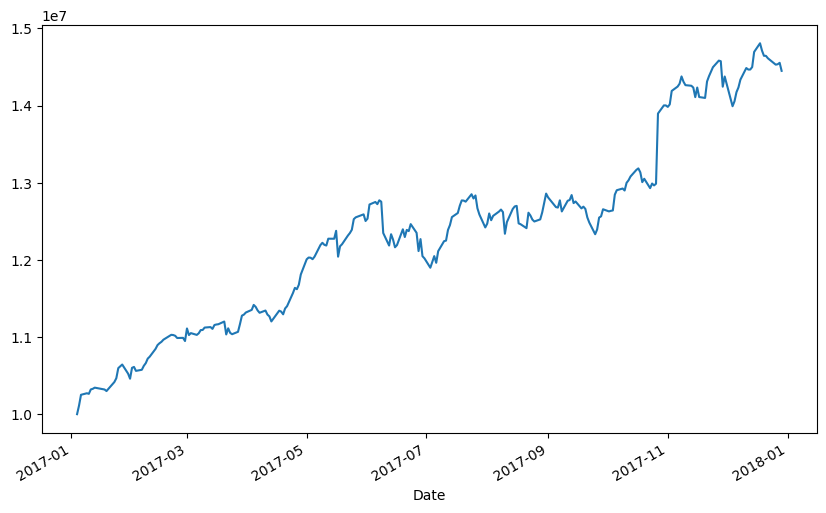

In [59]:
data['Portfolio Value'].plot(figsize=(10, 6))

## Save Data to CSV

In [60]:
#Update csv file
output_path='live_data.csv'
data.to_csv(output_path, mode='a', header=not os.path.exists(output_path))


## Updating the CSV

### Reading the next start date & Investment

In [88]:
# Read date from botton left cell of the csv file
df = pd.read_csv('live_data.csv')
start_date = pd.to_datetime(df.tail(1)['Date'])
start_date += pd.Timedelta(days=1)
start_date = start_date.dt.strftime('%Y-%m-%d')
start_date = start_date.values[0]

investment = df.tail(1)['Portfolio Value'].values[0]

In [89]:
assets = ['TSLA', 'NVDA', 'BBY']
weights = [0.6, 0.5, -0.1]
end_date = today

Portfolio = {assets[0]: weights[0],
                assets[1]: weights[1],
                assets[2]: weights[2],
                'investment': investment,
                'start_date': start_date,
                'end_date': end_date}

data = yf.download(" ".join(assets), start = Portfolio['start_date'], end=end_date)
data.head

c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  3 of 3 completed


<bound method NDFrame.head of Price       Adj Close                              Close              \
Ticker            BBY        NVDA        TSLA        BBY        NVDA   
Date                                                                   
2018-01-02  56.675076   49.312786   21.368668  69.160004   49.837502   
2018-01-03  56.052280   52.558254   21.150000  68.400002   53.117500   
2018-01-04  55.134476   52.835308   20.974667  67.279999   53.397499   
2018-01-05  56.437443   53.283054   21.105333  68.870003   53.849998   
2018-01-08  57.109432   54.915676   22.427334  69.690002   55.500000   
...               ...         ...         ...        ...         ...   
2024-02-02  75.690002  661.599976  187.910004  75.690002  661.599976   
2024-02-05  74.209999  693.320007  181.059998  74.209999  693.320007   
2024-02-06  74.839996  682.229980  185.100006  74.839996  682.229980   
2024-02-07  75.480003  700.989990  187.580002  75.480003  700.989990   
2024-02-08  75.489998  696.409973 

In [90]:
# Flattening headers in data
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.head()

,Adj Close_BBY,Adj Close_NVDA,Adj Close_TSLA,Close_BBY,Close_NVDA,Close_TSLA,High_BBY,High_NVDA,High_TSLA,Low_BBY,Low_NVDA,Low_TSLA,Open_BBY,Open_NVDA,Open_TSLA,Volume_BBY,Volume_NVDA,Volume_TSLA
Date,,,,,,,,,,,,,,,,,,
2018-01-02,56.675076,49.312786,21.368668,69.160004,49.837502,21.368668,69.389999,49.875000,21.474001,67.870003,48.625000,20.733334,68.260002,48.945000,20.799999,3693500,35561600,65283000
2018-01-03,56.052280,52.558254,21.150000,68.400002,53.117500,21.150000,69.389999,53.424999,21.683332,68.139999,50.937500,21.036667,69.180000,51.025002,21.400000,3564300,91470400,67822500
2018-01-04,55.134476,52.835308,20.974667,67.279999,53.397499,20.974667,69.010002,54.512501,21.236668,66.110001,53.172501,20.378668,68.849998,53.939999,20.858000,5193200,58326800,149194500
2018-01-05,56.437443,53.283054,21.105333,68.870003,53.849998,21.105333,68.970001,54.227501,21.149332,67.459999,52.770000,20.799999,67.900002,53.547501,21.108000,4115000,58012400,68868000
2018-01-08,57.109432,54.915676,22.427334,69.690002,55.500000,22.427334,70.110001,56.250000,22.468000,68.419998,54.645000,21.033333,68.680000,55.099998,21.066668,3617800,88121600,147891000
